<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/main/Tasca_M3_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

Create a function that, given a one-dimensional Array, gives you a basic statistical summary of the data. If it detects that the array has more than one dimension, it must display an error message.

In [3]:
import numpy as np
arr_1D = np.array([6.5,3.6,2.5,10.1,7.3 ])
arr_2D = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

def stat_summary(arr):
  print(arr)
  print(arr.ndim)
  if arr.ndim == 1:
    print("Average value is", np.mean(arr))
    print("Median value is", np.median(arr))
    print("Min value is", np.min(arr))
    print("Max value is", np.max(arr))
    print("Standard deviation is",np.std(arr))
  else:
    print("Error: array is not 1D")


stat_summary(arr_1D)
print()
stat_summary(arr_2D)

[ 6.5  3.6  2.5 10.1  7.3]
1
Average value is 6.0
Median value is 6.5
Min value is 2.5
Max value is 10.1
Standard deviation is 2.711457172813172

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
Error: array is not 1D


### Exercise 2

Create a function that generates an NxN square of random numbers between 0 and 100.

In [82]:
import numpy as np
from random import randint

def matrix_n_times_n(n):
  matrix= np.random.randint(0,100,size = (n,n))
  return matrix

print(matrix_n_times_n(8))

[[11 59 38 45 37  6 17 28]
 [17 51 55 15 28 32 76 56]
 [50 33 93 34 15 55  3 92]
 [84 76 91 58 47 36 47 63]
 [86 26  4 28 59 58 95 17]
 [39 46 97  1 14  5 37 69]
 [94 66 52 65 14 47 31 49]
 [ 6 55 55 97  1 42 60 94]]


### Exercise 3

Create a function that, given a two-dimensional table (NxM), calculates the totals per row and the totals per column.

In [66]:
import numpy as np

def table_calc(table_a):
  rows= len(table_a)
  columns = len(table_a[0])

  for i in range(rows):
      addition = np.sum(table_a, axis = 0)
      new_row = np.append([], addition)
      
  for j in range(columns):
      addition = np.sum(table_a, axis = 1)

  new_column = np.append([], addition)

  #new_row_total = np.sum(new_row)

  #totals_row = np.append(new_row, [new_row_total])

  #new_column_matrix = np.hstack((table_a,new_column[:,None]))

  #final_matrix = np.vstack((new_column_matrix,totals_row[:None]))

  #print(final_matrix.ndim)
  #print(final_matrix)
  print("Totals for rows are:", new_column)
  print("Totals for columns are:", new_row)
  

table_a = np.arange(45).reshape(5,9)
table_calc(table_a)

Totals for rows are: [ 36. 117. 198. 279. 360.]
Totals for columns are: [ 90.  95. 100. 105. 110. 115. 120. 125. 130.]


### Exercise 4

Manually implement a function that calculates the correlation coefficient. Learn about its uses and interpretation.

From:
https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

[[ 1.          1.         -1.         -0.01529094]
 [ 1.          1.         -1.         -0.01529094]
 [-1.         -1.          1.          0.01529094]
 [-0.01529094 -0.01529094  0.01529094  1.        ]]


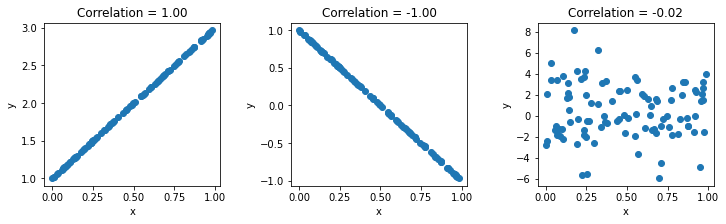

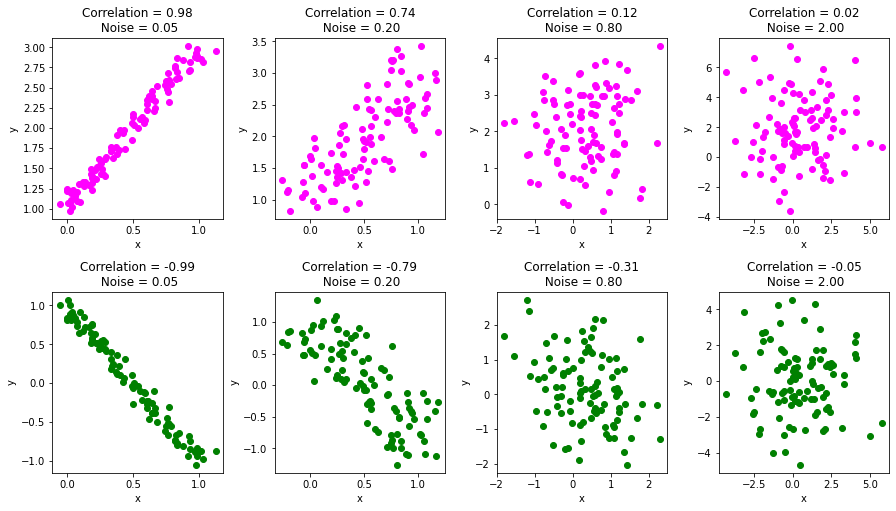

In [76]:
import numpy as np
import matplotlib.pyplot as plt


seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))

rho = np.corrcoef(x)
print(rho)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for i in [0,1,2]:
    ax[i].scatter(x[0,],x[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]):
    # Add noise
    x_with_noise = x+rand.normal(0,noise,x.shape)
    
    # Compute correlation
    rho_noise = np.corrcoef(x_with_noise)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1])
                        + '\n Noise = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2])
                        + '\n Noise = ' + "{:.2f}".format(noise))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()